여기 더 추가할 예정
- 장애인 거주시설 말고 편의시설로 정한 이유를 복지사업 응답 데이터나 복지서비스 이용경험 여부 데이터를 근거로 하여 설명

### 한글 폰트 설정

In [35]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

### 2023년도 지역별 장애인 편의시설 설치 현황 데이터 사용

In [8]:
import csv

inst_status_pwd_2023 = []

with open('../데이터/2018_2023_시도별_장애인_편의시설_설치현황.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    next(data)

    for row in data:
        row_2023 = row[0:1] + row[7:13]
        inst_status_pwd_2023.append(row_2023)
        print(row_2023)

['구분', '대상건물', '기준항목', '설치', '설치율', '적정설치', '적정설치율']
['서울', '34440', '812487', '747930', '92.1%', '682738', '84.0%']
['부산', '16320', '440244', '396768', '90.1%', '349422', '79.4%']
['대구', '8018', '263653', '237186', '90.0%', '214106', '81.2%']
['인천', '12555', '358048', '323222', '90.3%', '282107', '78.8%']
['광주', '7711', '227541', '203779', '89.6%', '178692', '78.5%']
['대전', '3945', '134611', '121277', '90.1%', '109774', '81.6%']
['울산', '2686', '92885', '84107', '90.6%', '76757', '82.6%']
['세종', '1421', '57530', '53897', '93.7%', '49854', '86.7%']
['경기', '44352', '1286189', '1172564', '91.2%', '1063908', '82.7%']
['강원', '8930', '288648', '245749', '85.1%', '213159', '73.9%']
['충북', '8028', '231005', '203961', '88.3%', '179874', '77.9%']
['충남', '11208', '343658', '303847', '88.4%', '269117', '78.3%']
['전북', '11212', '391752', '341557', '87.2%', '294994', '75.3%']
['전남', '10722', '361499', '305110', '84.4%', '258609', '71.5%']
['경북', '14782', '468721', '406321', '86.7%', '359225', '76.6%

### plt.bar()를 통한 지역별 장애인 편의시설 설치 현황 시각화

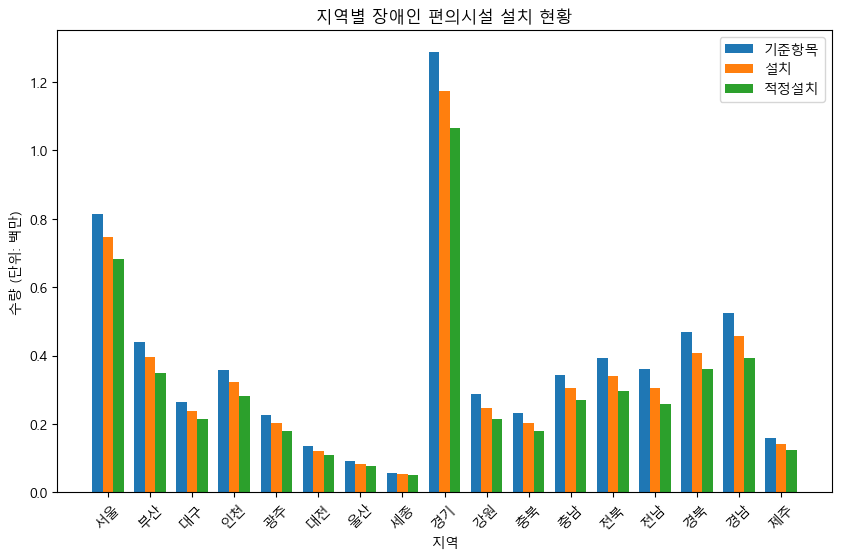

In [9]:
# 데이터 전처리
regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
criteria = [int(row[2]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
appropriate_inst = [int(row[5]) / 1e6 for row in inst_status_pwd_2023[1:-1]]

# 바 그래프 그리기
x = np.arange(len(regions))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, criteria, width, label='기준항목')
bars2 = ax.bar(x, installations, width, label='설치')
bars3 = ax.bar(x + width, appropriate_inst, width, label='적정설치')

# 그래프에 레이블 추가
ax.set_xlabel('지역')
ax.set_ylabel('수량 (단위: 백만)')
ax.set_title('지역별 장애인 편의시설 설치 현황')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45)
ax.legend()
plt.show()


- **기준항목**이란 법적 기준에 의거하여 설치해야하는 장애인 편의시설 수입니다.
- **설치**는 설치된 장애인 편의시설 수입니다.
- **적정설치**는 설치된 장애인 편의시설 중에서 법적 기준을 준수한 시설 수입니다.
- 경기 지역에 기준항목 수가 가장 많았습니다.

### sns.heatmap()을 통한 지역별 장애인 편의시설 설치율 및 적정설치율 비교

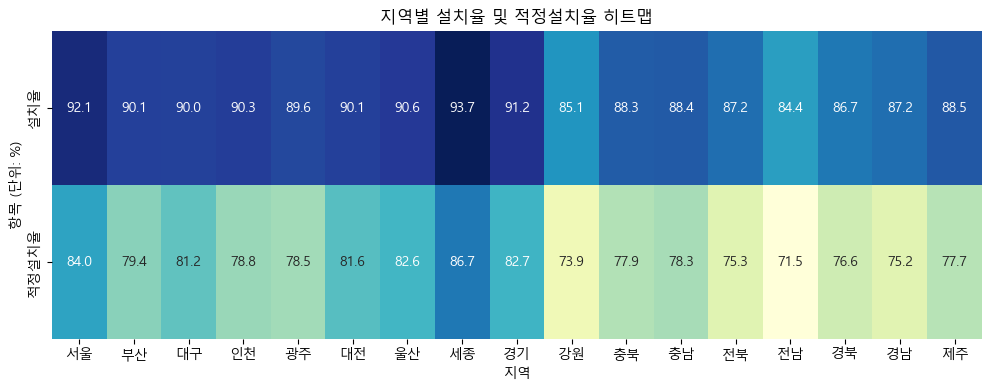

In [10]:
import seaborn as sns

inst_rate = [float(row[4].replace('%', '')) for row in inst_status_pwd_2023[1:-1]]
appropriate_inst_rate = [float(row[6].replace('%', '')) for row in inst_status_pwd_2023[1:-1]]

# 히트맵 데이터 생성
data = np.array([inst_rate, appropriate_inst_rate])
labels = ['설치율', '적정설치율']

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(12, 4))

sns.heatmap(data, annot=True, fmt=".1f", cmap="YlGnBu", xticklabels=regions, yticklabels=labels, ax=ax, cbar=False)
ax.set_xlabel('지역')
ax.set_ylabel('항목 (단위: %)')
ax.set_title('지역별 설치율 및 적정설치율 히트맵')
plt.show()

- **설치율**은 기준항목 대비 설치 비율입니다.   
- **적정설치율**은 기준항목 대비 적정설치 비율로, 시설의 품질을 의미한다고 볼 수 있습니다.
- 색이 진할 수록 비율이 높아지며 색이 연할 수록 비율이 낮아집니다.
- 세종, 서울, 경기 지역에서 설치율과 적정설치율이 모두 높았으며, 전남과 강원 지역에서 설치율과 적정설치율이 모두 낮았습니다.

### plt.scatter()를 통한 지역별 장애인구 수와 편의시설 수의 관계 시각화

#### 2023년도 지역별 장애인구 수 데이터 사용

In [91]:
pwd_2023 = []

with open('../데이터/2023_장애유형별_시도별_등록장애인_수_20241130123153.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    for row in data:
        row_2023 = row[1:3]
        pwd_2023.append(row_2023)
        print(row_2023)

['시도별', '합계']
['전국', '2641896']
['서울특별시', '389795']
['부산광역시', '175467']
['대구광역시', '130521']
['인천광역시', '152226']
['광주광역시', '69314']
['대전광역시', '71440']
['울산광역시', '51383']
['세종특별자치시', '12944']
['경기도', '586421']
['강원특별자치도', '100520']
['충청북도', '97117']
['충청남도', '134004']
['전북특별자치도', '130189']
['전라남도', '136472']
['경상북도', '178340']
['경상남도', '188825']
['제주특별자치도', '36918']


#### 지역별 장애인구 수 대비 편의시설 수 산점도 그리기

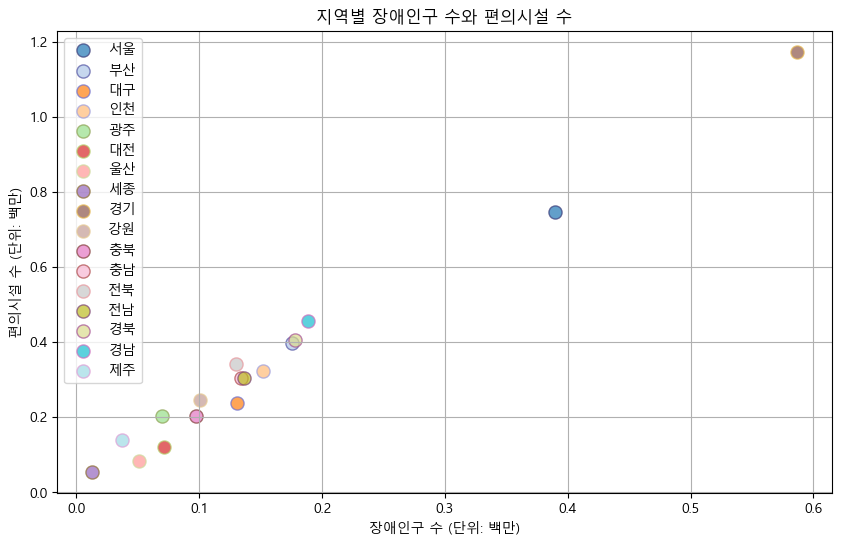

In [12]:
regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
population = [int(row[1]) / 1e6 for row in pwd_2023[2:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], installations[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

plt.xlabel('장애인구 수 (단위: 백만)')
plt.ylabel('편의시설 수 (단위: 백만)')
plt.title('지역별 장애인구 수와 편의시설 수')
plt.legend()
plt.grid(True)
plt.show()

- 서울과 경기 지역에서 장애인구 수와 편의시설 수가 모두 많았습니다.
- 평균적으로 편의시설 수는 장애인구 수보다 약 2배 정도 많았습니다.
- 편의시설 수량이 체감이 안되는 이유는 편의시설 항목 안에 시설을 구성하는 비치용품 등을 포함하고 있기 때문입니다.

### 평균 비율 선으로 장애인구 수 대비 편의시설 수가 상대적으로 많은 지역 확인

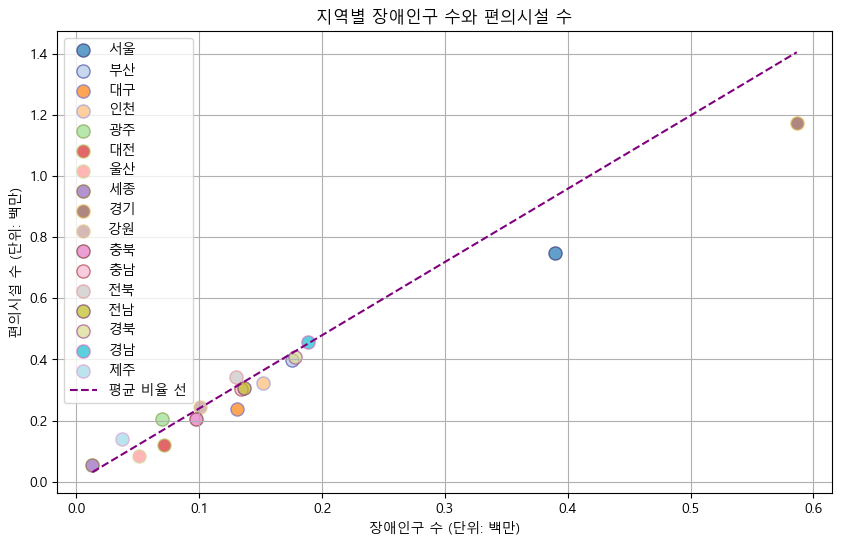

In [13]:
import numpy as np

regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
population = [int(row[1]) / 1e6 for row in pwd_2023[2:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], installations[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

# 평균 비율 계산
mean_ratio = np.mean([installations[i] / population[i] for i in range(len(regions))])
x_vals = np.linspace(min(population), max(population), 100)
y_vals = mean_ratio * x_vals
plt.plot(x_vals, y_vals, color='purple', linestyle='--', label='평균 비율 선')

plt.xlabel('장애인구 수 (단위: 백만)')
plt.ylabel('편의시설 수 (단위: 백만)')
plt.title('지역별 장애인구 수와 편의시설 수')
plt.legend()
plt.grid(True)
plt.show()


- 타 지역에 비해 상대적으로 세종, 제주, 광주, 전북 등이 장애인구 수 대비 편의시설 수가 높았습니다.
- 설치율과 적정설치율이 모두 높았던 경기와 서울의 경우, 장애인구 수 대비 편의시설 수는 상대적으로 낮았습니다.
- 장애인 편의시설은 공용시설을 포함하기 때문에 경기 또는 서울 지역에 편의시설을 늘려야 한다는 근거로 활용하기에는 한계가 있습니다.
- 결론적으로 복지 향상을 위해 더 많은 조사와 분석을 할 필요가 있습니다.

## 2. 아동과 아동복지시설 분석

- 대표적인 아동복지시설이라고 할 수 있는 어린이집과 아동양육시설을 비교 분석합니다. (2-3, 2-4)
- **어린이집**은 6세 미만 아동이 입소하는 대표적인 아동복지시설입니다.
- **아동양육시설**은 보호자가 없는 만 18세 미만의 아동이 입소하여 보호조치를 받는 시설입니다.
- 6세 미만 아동 수 대비 어린이집 수를 분석합니다. (2-5)
- 6세 미만 아동 수 대비 아동양육시설 수를 분석합니다. (2-6)

### 2-1. 2022년도 지역별 어린이집 현황 데이터 사용

In [92]:
import csv

inst_daycare_chd_2022 = []

with open('../데이터/어린이집_현황_시도_20241122115855.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    next(data)

    for row in data:
        row_2022 = row[0:1] + row[-2:-1]
        inst_daycare_chd_2022.append(row_2022)
        

with open('../데이터/전국_어린이집_정현원_현황_20241202230814.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    next(data)

    for i, row in enumerate(data):
        inst_daycare_chd_2022[i] += row[2:]
        print(inst_daycare_chd_2022[i])
        
        

['전국', '30923', '1476686', '1095450']
['서울특별시', '4712', '223628', '167427']
['부산광역시', '1547', '76146', '55850']
['대구광역시', '1139', '59434', '42487']
['인천광역시', '1697', '80896', '62200']
['광주광역시', '940', '46531', '31732']
['대전광역시', '1013', '39145', '28144']
['울산광역시', '656', '31746', '24892']
['세종특별자치시', '327', '18789', '14927']
['경기도', '9438', '424321', '331516']
['강원특별자치도', '906', '45475', '32680']
['충청북도', '972', '54338', '38884']
['충청남도', '1516', '72870', '52196']
['전북특별자치도', '1024', '51748', '34789']
['전라남도', '999', '56047', '38927']
['경상북도', '1463', '72231', '48988']
['경상남도', '2123', '96773', '68841']
['제주특별자치도', '451', '26568', '20970']


### 2-2. 2022년도 지역별 아동양육시설 현황 데이터 사용

In [93]:
import csv

inst_welfare_chd_2022 = []

with open('../데이터/2022_아동복지시설_보호아동_성별_취학_현황.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    next(data)
    next(data)

    for row in data:
        row_2022 = row[0:2] + row[3:5] + row[8:]
        inst_welfare_chd_2022.append(row_2022)
        print(row_2022)

['구분', '시설수', '정원', '계', '0~3세미만', '3~6세미만', '초등재', '중재', '고재', '대재', '기타']
['계', '306', '15479', '10312', '655', '1436', '3806', '1781', '1780', '444', '410']
['서울', '43', '2494', '1923', '180', '399', '747', '219', '236', '46', '96']
['부산', '20', '1210', '800', '39', '75', '281', '134', '229', '19', '23']
['대구', '22', '1079', '637', '23', '71', '249', '117', '102', '24', '51']
['인천', '16', '671', '506', '54', '70', '198', '101', '77', '3', '3']
['광주', '15', '629', '452', '47', '54', '175', '79', '68', '16', '13']
['대전', '13', '712', '402', '15', '50', '119', '102', '72', '8', '36']
['울산', '3', '189', '125', '7', '19', '51', '28', '9', '3', '8']
['세종', '1', '48', '18', '', '1', '4', '5', '7', '', '1']
['경기', '37', '1458', '1024', '77', '154', '392', '203', '158', '10', '30']
['강원', '11', '467', '274', '21', '23', '81', '48', '46', '31', '24']
['충북', '16', '672', '477', '35', '63', '180', '75', '77', '20', '27']
['충남', '14', '770', '564', '35', '97', '210', '95', '82', '36', '9']
['전북'

### 2-3. plt.bar()를 통한 지역별 어린이집 수와 아동양육시설 수 비교

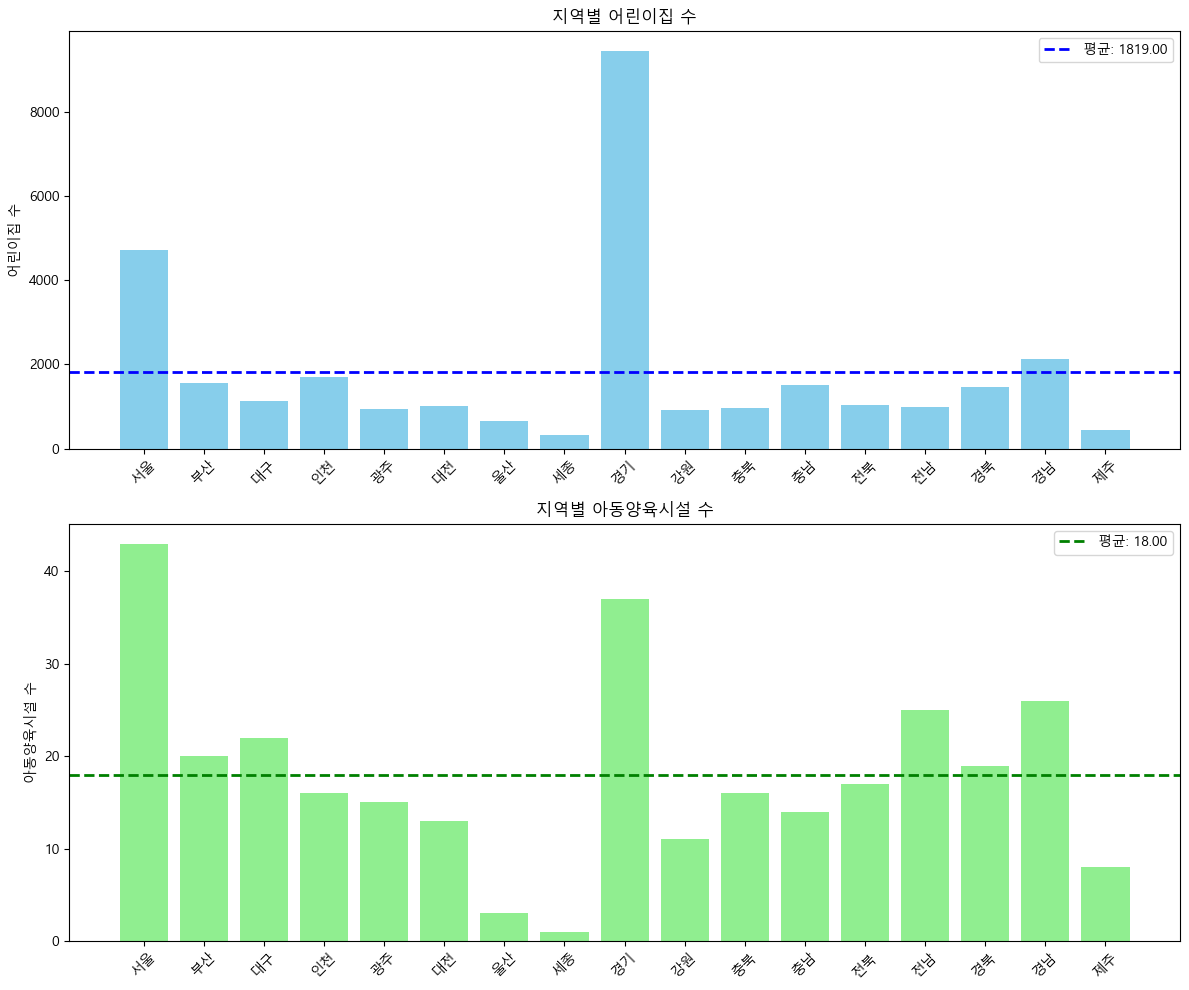

In [108]:
import matplotlib.pyplot as plt

# 데이터 변환
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
daycare = [int(row[1]) for row in inst_daycare_chd_2022[1:]]
welfare = [int(row[1]) for row in inst_welfare_chd_2022[2:]]

# 평균 계산
avg_daycare = sum(daycare) / len(daycare)
avg_welfare = sum(welfare) / len(welfare)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# 유치원 바 그래프
axes[0].bar(regions, daycare, color='skyblue')
axes[0].axhline(avg_daycare, color='blue', linestyle='--', linewidth=2, label=f'평균: {avg_daycare:.2f}')
axes[0].set_title('지역별 어린이집 수')
axes[0].set_ylabel('어린이집 수')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# 아동복지시설 바 그래프
axes[1].bar(regions, welfare, color='lightgreen')
axes[1].axhline(avg_welfare, color='green', linestyle='--', linewidth=2, label=f'평균: {avg_welfare:.2f}')
axes[1].set_title('지역별 아동양육시설 수')
axes[1].set_ylabel('아동양육시설 수')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()


- 서울과 경기 지역의 아동복지시설 수가 많았습니다.
- 어린이집 수는 아동양육시설 수의 약 100배 정도임을 알 수 있습니다.

### 2-4. sns.heatmap()을 통한 지역별 아동복지시설의 포화도 시각화

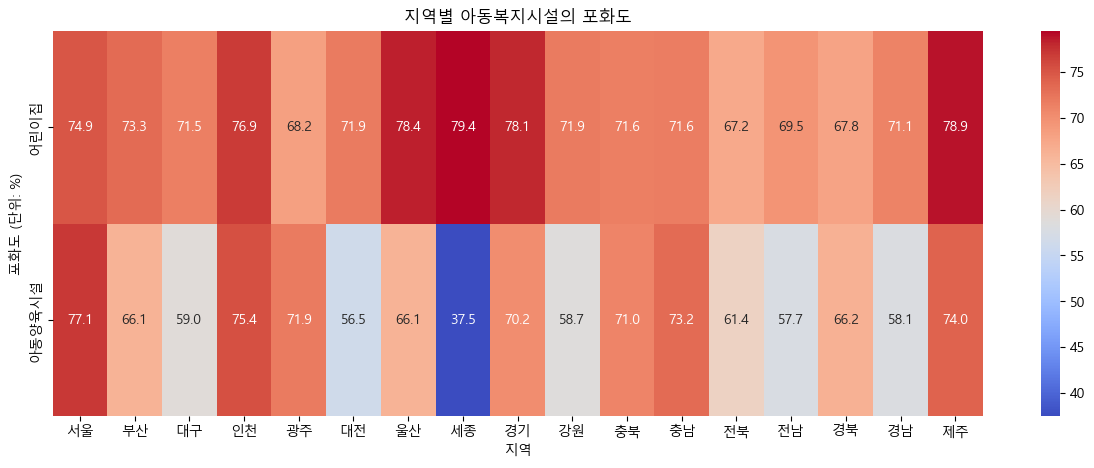

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 변환
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
daycare_capacity = [int(row[2]) for row in inst_daycare_chd_2022[1:]]
daycare_current = [int(row[3]) for row in inst_daycare_chd_2022[1:]]
welfare_capacity = [int(row[2]) for row in inst_welfare_chd_2022[2:]]
welfare_current = [int(row[3]) for row in inst_welfare_chd_2022[2:]]

daycare_pers = [(daycare_current[i] / daycare_capacity[i]) * 100 for i in range(len(daycare_capacity))]
welfare_pers = [(welfare_current[i] / welfare_capacity[i]) * 100 for i in range(len(welfare_capacity))]

# 히트맵 데이터 생성
data = np.array([daycare_pers, welfare_pers])
labels = ['어린이집', '아동양육시설']

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(data, annot=True, fmt=".1f", cmap="coolwarm", xticklabels=regions, yticklabels=labels, ax=ax)
ax.set_xlabel('지역')
ax.set_ylabel('포화도 (단위: %)')
ax.set_title('지역별 아동복지시설의 포화도')
plt.show()

- **포화도**는 아동복지시설의 정원 수 대비 입소자 수입니다.
- 붉은색에 가까운 지역일수록 아동복지시설의 포화도가 높은 지역이며 푸른색에 가까운 지역일수록 포화도가 낮은 지역입니다.
- 어린이집의 포화도는 모든 지역에서 전반적으로 높으며, 세종이 가장 높습니다.
- 아동양육시설의 경우, 서울의 포화도가 가장 높으며, 세종이 가장 낮습니다.

### 2-5. 6세 미만 아동 인구 수 대비 어린이집 수 시각화

#### 2022년도 지역별 6세 미만 인구수 데이터 사용

In [96]:
import csv

chd_2022 = []

with open('../데이터/1996~2023연령별_인구변화_전체.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    next(data)
    next(data)

    for row in data:
        if row[1] == '계' or row[1] == '100세 이상':
            continue
        if int(row[1].replace('세', '')) < 6:
            found = False
            for item in chd_2022:
                if item[0] == row[0]:
                    item.append(row[-2])
                    found = True
                    break
            if not found:
                chd_2022.append([row[0], row[-2]])
    
for row in chd_2022:
    print(row)

['전국', '244250', '264788', '277529', '307975', '333048', '364198']
['서울특별시', '40742', '43950', '44177', '48120', '50630', '55088']
['부산광역시', '13792', '14862', '15580', '17495', '19543', '21678']
['대구광역시', '9994', '11014', '11667', '13672', '14875', '16661']
['인천광역시', '14617', '15716', '16671', '18560', '19985', '21355']
['광주광역시', '7333', '8099', '7980', '9120', '9967', '10974']
['대전광역시', '7651', '7924', '7922', '8752', '9364', '10555']
['울산광역시', '5275', '6071', '6433', '7279', '7907', '8892']
['세종특별자치시', '3100', '3611', '3655', '4114', '4484', '4889']
['경기도', '74114', '79007', '82889', '91427', '98890', '107169']
['강원도', '7240', '7610', '8222', '8789', '8899', '9611']
['충청북도', '7337', '8312', '8689', '9355', '10697', '11414']
['충청남도', '10106', '11191', '12188', '13386', '14440', '15899']
['전라북도', '6912', '7584', '8302', '9190', '10220', '11491']
['전라남도', '7713', '8492', '9299', '10342', '10770', '11689']
['경상북도', '11097', '11985', '12838', '14248', '15681', '17028']
['경상남도', '13704', '

#### plt.scatter()를 통해 시각화

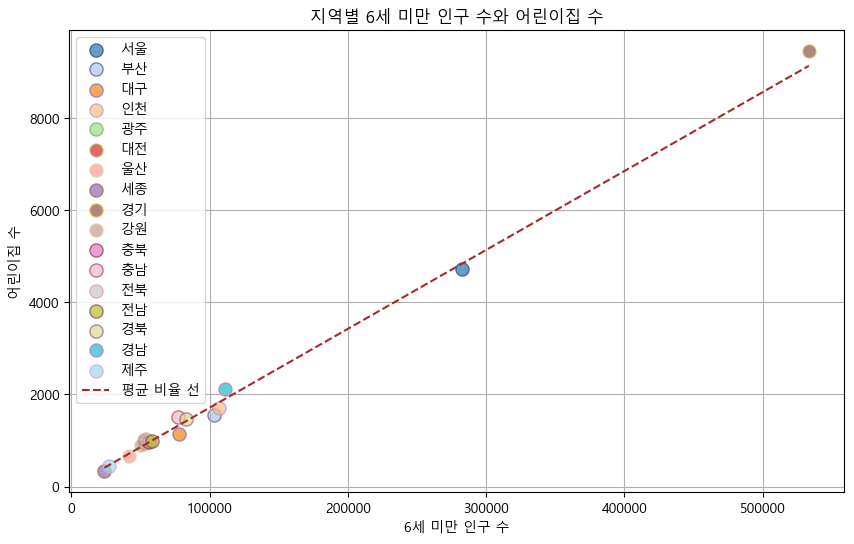

In [105]:
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
daycare = [int(row[1]) for row in inst_daycare_chd_2022[1:]]
population = [int(row[1]) + int(row[2]) + int(row[3]) + int(row[4]) + int(row[5]) + int(row[6]) for row in chd_2022[1:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], daycare[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

# 평균 비율 계산
mean_ratio = np.mean([daycare[i] / population[i] for i in range(len(regions))])
x_vals = np.linspace(min(population), max(population), 100)
y_vals = mean_ratio * x_vals
plt.plot(x_vals, y_vals, color='brown', linestyle='--', label='평균 비율 선')

plt.xlabel('6세 미만 인구 수')
plt.ylabel('어린이집 수')
plt.title('지역별 6세 미만 인구 수와 어린이집 수')
plt.legend()
plt.grid(True)
plt.show()

- 6세 미만 인구 수 대비 어린이집 수가 상대적으로 많은 지역은 충남, 경남, 경기입니다.
- 일정 비율을 모든 지역에서 따르고 있기 때문에 어린이집 수와 인구 수 사이에 강한 상관관계가 있음을 짐작해 볼 수 있습니다.

### 2-6. 6세 미만 아동 인구수 대비 아동양육시설 수

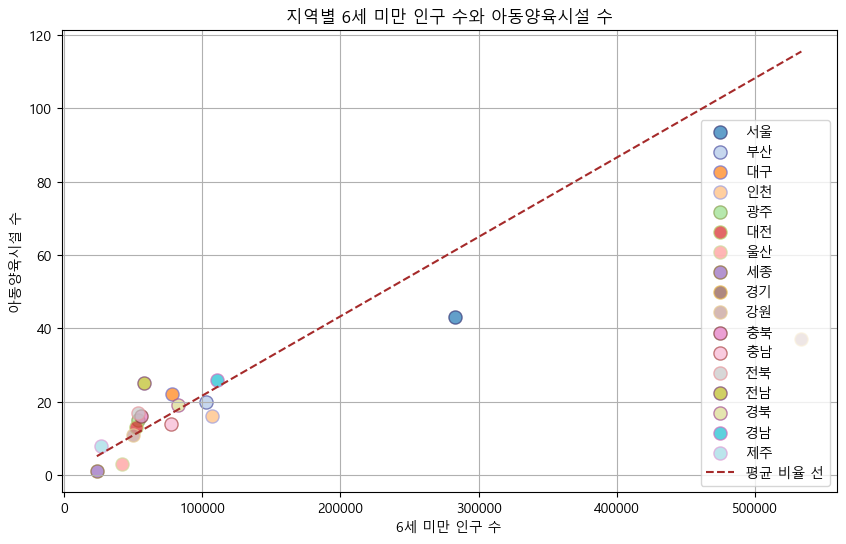

In [106]:
regions = [row[0] for row in inst_welfare_chd_2022[2:]]
welfare = [int(row[1]) for row in inst_welfare_chd_2022[2:]]
population = [int(row[1]) + int(row[2]) + int(row[3]) + int(row[4]) + int(row[5]) + int(row[6]) for row in chd_2022[1:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], welfare[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

# 평균 비율 계산
mean_ratio = np.mean([welfare[i] / population[i] for i in range(len(regions))])
x_vals = np.linspace(min(population), max(population), 100)
y_vals = mean_ratio * x_vals
plt.plot(x_vals, y_vals, color='brown', linestyle='--', label='평균 비율 선')

plt.xlabel('6세 미만 인구 수')
plt.ylabel('아동양육시설 수')
plt.title('지역별 6세 미만 인구 수와 아동양육시설 수')
plt.legend()
plt.grid(True)
plt.show()

- 아동양육시설 수와 6세 미만 인구 수 사이의 상관관계는 상대적으로 약하다고 볼 수 있습니다.
- 아동양육시설은 어린이집과 다르게 특수한 경우에만 입소가능하며, 연령대도 비교적 다양하기 때문으로 짐작해볼 수 있습니다.

## 3. 노인과 노인요양시설 분석

### 3-1. 2022년도 지역별 노인요양시설 데이터 사용

In [115]:
import csv

inst_welfare_eld_2022 = []

with open('../데이터/보건복지부_노인복지 생활시설 수 및 생활자 현황_시설 종류별_시도별_20221231.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    inst_welfare_eld_2022.append(next(data)[1:])
    print(inst_welfare_eld_2022[0])

    for row in data:
        if row[0] != '2022':
            continue
        row_2022 = row[1:]
        inst_welfare_eld_2022.append(row_2022)
        print(row_2022)

['시도', '노인주거복지시설_양로시설_시설수', '노인주거복지시설_양로시설_정원', '노인주거복지시설_양로시설_현원', '노인주거복지시설_노인공동생활가정_시설수', '노인주거복지시설_노인공동생활가정_정원', '노인주거복지시설_노인공동생활가정_현원', '노인의료복지시설_노인요양시설_시설수', '노인의료복지시설_노인요양시설_정원', '노인의료복지시설_노인요양시설_현원', '노인의료복지시설_노인요양공동생활가정_시설수', '노인의료복지시설_노인요양공동생활가정_정원', '노인의료복지시설_노인요양공동생활가정_현원']
['서울Seoul', '9', '1156', '869', '3', '27', '18', '229', '13729', '12118', '262', '2326', '2119']
['부산Busan', '4', '303', '213', '1', '9', '9', '97', '6564', '4968', '23', '207', '154']
['대구Daegu', '6', '478', '251', '0', '0', '0', '141', '8386', '6589', '122', '1085', '973']
['인천Incheon', '11', '409', '202', '6', '54', '31', '392', '17837', '14194', '91', '811', '660']
['광주Gwangju', '2', '152', '74', '1', '9', '6', '89', '3745', '2805', '13', '108', '90']
['대전Daejeon', '3', '247', '94', '4', '28', '22', '103', '6748', '5137', '42', '372', '335']
['울산Ulsan', '2', '114', '50', '0', '0', '0', '39', '2115', '1841', '16', '143', '128']
['세종Sejong', '1', '15', '8', '0', '0', '0', '17', '741', '543', '3', '27',

### 3-2. 2022년도 지역별 65세 이상 인구 수 데이터 사용

In [121]:
import csv

eld_2022 = []

with open('../데이터/1996~2023연령별_인구변화_전체.csv', 'r', encoding='euc-kr') as f:
    data = csv.reader(f)

    next(data)
    next(data)

    for row in data:
        if row[1] == '계':
            continue
        age = row[1].replace('세 이상', '').replace('세', '')
        if int(age) > 65:
            found = False
            for item in eld_2022:
                if item[0] == row[0]:
                    item[1] += int(row[-2])
                    found = True
                    break
            if not found:
                eld_2022.append([row[0], int(row[-2])])

for row in eld_2022:
    print(row)


['전국', 8524569]
['서울특별시', 1526103]
['부산광역시', 655267]
['대구광역시', 400694]
['인천광역시', 422219]
['광주광역시', 205146]
['대전광역시', 212971]
['울산광역시', 147926]
['세종특별자치시', 36674]
['경기도', 1821014]
['강원도', 321692]
['충청북도', 290874]
['충청남도', 406036]
['전라북도', 382746]
['전라남도', 427594]
['경상북도', 573414]
['경상남도', 587306]
['제주특별자치도', 106893]
